In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

import Module as mod

In [3]:
import plt_conf as conf
conf.general()  # cargando configuración general

A continuación veamos como resolver numéricamente (usando diferencias finitas) la ecuación de Klein-Gordon en 1+1 dimensión 
$$
u_{tt} = u_{xx} + V'(u) + f(x, t) \tag{A}
$$

### Discretizando el dominio

Para la resolución del problema tenemos que discretizar nuestro dominio temporal por ejemplo $[t_{min}, t_{max}]$ y espacial $[x_{min}, x_{max}]$, es decir:
$$
t_{min}=t_0<t_1< t_2< \dots < t_{N_t-1} < t_{N_t}=t_{max}, \qquad x_{min}=x_0<x_1< x_2< \dots < x_{N_x-1} < t_{N_x}=x_{max},
$$ 

lo que nos lleva a construir una *malla* bidimensional correspondiente al plano $x, t$, cuyas cordenadas serían $(x_i, t_n)$, con $i=0,\dots, N_x$ y $n=0,\dots, N_t$.


**IMPLEMENTACION:** Para la implementación es recomendable definir: 
$$
x_i = x_0 + i\triangle x, \quad t_n = t_0 + n \triangle t
$$

donde $\triangle x, \triangle t$ representan el ancho de las mallas espaciales y temporales respectivamente.

### Discretizando la solución

Tendremos que la solución $u(x, t)$ estará discretizada, es decir, evaluada en la malla $2D$. Por simplicidad es usual introducir la notación $u_{i}^{n}$ para indicar la solución aproximada en el punto $(x_i, t_n)$.

### Discretizando la ecuación diferencial

Antes de proceder a nuestro problema de interés, consideremos discretizar el ecuación diferencial 

$$
\frac{\partial^2 u}{\partial t^2}=\frac{\partial^2 u}{\partial x^2},
$$

con condiciones de fronteras e iniciales:
\begin{align}
u(x, 0)& = u_0(x), \qquad x\in [0, L],\\
u_t(x, 0)& = 0, \qquad x\in [0, L],\\
u(0, t)&=0, \qquad t>0,\\
u(L, t)&=0, \qquad t>0.
\end{align}

Para ello remplazaremos la segunda derivada por su aproximación de segundo orden de la diferencia central:
$$
\frac{\partial^2}{\partial t^2}u(x_i, t_n)\approx \frac{u_{i}^{n+1}-2u_{i}^{n}+u_{i}^{n-1}}{\triangle t^2}=[D_tD_t u]^{n}_{i}.
$$

Finalmente tendremos que:
\begin{align}
\frac{u_{i}^{n+1}-2u_{i}^{n}+u_{i}^{n-1}}{\triangle t^2}&= \frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\triangle x^2}.
\end{align}

Que abreviado se escribiría como:
$$
[D_tD_t u = D_xD_x u]^{n}_{i}.
$$

Ahora nuestro objetivo es encontrar $u_{i}^{n+1}$, es decir evolucionar en el tiempo toda la malla espacial, para ello debemos despejar este término en la versión discreta de la ecuación diferencial, quedando 
$$
u_{i}^{n+1} =  -u_{i}^{n-1}+2u_{i}^{n}+C^2(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}),
$$

donde $C=\frac{\triangle t}{\triangle x}$ y es conocido como el número de Courant. El cual no es más que el parámetro que discretiza la ecuación de onda.

Interpretemos nuestra discretización. Como se aprecia el valor de $u_i^{n+1}$ dependerá del valor de sus vecinos $u_{i\pm 1}^{n}$ y $u_i^{n}$, $u_i^{n - 1}$ como se ilustra en la figura

<img src="Imagenes/fig1.png">

NOTAN ALGO PROBLEMATICO? Necesitamos $u_i^{n - 1}$ !!!!!!!

#### Condiciones de iniciales y de frontera

De manera similar debemos discretizar nuestra condición inicial: $\frac{\partial}{\partial t}u(x, 0)=0$. Para ello tomamos la aproximación para la primera derivada de la diferencia central:
$$
\frac{\partial}{\partial t} u(x_i, t_0)\approx \frac{u_i^{1}-u_i^{-1}}{2\triangle t}=[D_{2t}u]^{0}_{i}=0,
$$
de donde tendremos que $u_i^{-1}=u_i^{1}$. La otra condición inicial nos lleva a $u_{i}^{0}=u_0(x_i)$ para $i=0,\dots, N_x$. De las condiciones de frontera tendremos que $u_{0}^{n}=u_{N_x}^{n}=0$ (extremos fijos).

#### Primer paso de iteración (n=0)
Veamos ahora como sería el primer paso de iteración en el tiempo $n=0$:
$$
u_{i}^{1} = -u_{i}^{-1}+2u_{i}^{0}+C^2(u_{i+1}^{0}-2u_{i}^{0}+u_{i-1}^{0}),
$$

Notan algo raro? Necesitamos computar $u_{i}^{-1}$.

Usando la relación obtenida anteriormente ($u_i^{-1}=u_i^{1}$), podemos obtener la expresión para el primer paso de iteración:
$$
u_{i}^{1} = u_{i}^{0}+\frac{C^2}{2}(u_{i+1}^{0}-2u_{i}^{0}+u_{i-1}^{0}).
$$

Esquemáticamente lo que tendriamos sería

<img src="Imagenes/fig2.png">

#### Nuestro Problema

Como vimos, la ecuación de KG en $1+1$ dimensiones es (A):
$$
u_{tt} = u_{xx} + V'(u) + f(x, t).
$$

Asumiendo condiciones de fronteras e iniciales:
\begin{align}
u(x, 0)& = u_0(x), \qquad x\in [x_{min}, x_{max}],\\
u_t(x, 0)& = du_0(x), \qquad x\in [x_{min}, x_{max}],\\
u(x_{min}, t)&=c_1, \qquad t>0,\\
u(x_{max}, t)&=c_2, \qquad t>0.
\end{align}

Usando la notación anteriormente vista tendremos que:
$$
[D_t D_t u = D_x D_x u + V'(u) +f]_i^{n}.
$$

Resolviendo para $u_i^{n+1}$ llegamos a:
\begin{align}\tag{B}
u^{n+1}_i = -u^{n-1}_i + 2u^n_i + C^2
    (u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}) + \Delta t^2 (V'(u^{n}_{i}) + f^n_i).
\end{align}

Similar al caso anterior, presentamos un *problema* al realizar el primer paso de iteración. Repitiendo el mismo proceso visto obtenemos la expresión para el primer paso de iteración en el tiempo, para ello discretizamos la condición inicial $u_t=du_0(x)$ en $t=0$,
$$
[D_{2t}u = du_0]^0_i\quad\Rightarrow\quad u^{-1}_i = u^{1}_i - 2\Delta t \, du_{0i},
$$

Lo cual nos lleva a:
\begin{align}\begin{aligned}\tag{C}
u^{1}_i = u^0_i + \Delta t \, du_{0i} + {\frac{1}{2}} C^2 \left(u^{0}_{i+1}-2u^{0}_{i} + u^{0}_{i-1}\right) + \frac{1}{2}\Delta t^2 (V'(u^{0}_{i}) + f^0_i) {\thinspace .}\end{aligned}
\end{align}

Expresión que utilizaremos para el primer paso de iteración.

RESUMIENDO nuestro esquema de iteración:

- Calculamos $u_i^{0}=u_0(x_i)$ para $i=0,\dots, N_x$,

- Calculamos $u_i^{1}$ mediante:
$$
u^{1}_i = u^0_i + \Delta t \, du_{0i} + {\frac{1}{2}} C^2 \left(u^{0}_{i+1}-2u^{0}_{i} + u^{0}_{i-1}\right) + \frac{1}{2}\Delta t^2 (V'(u^{0}_{i}) + f^0_i) .
$$
- Fijamos los $u_i^{1}=$ para los puntos de las fronteras $x_{min}, x_{max}$ $i=0, N_x$ a sus valores ($c_1, c_2$) respectivamente. Recordar que esto es para todo $n=1,\dots, N_t-1$.
- Posterior a lo anterior, para cada paso de iteración temporal $n=1, 2,\dots, N_t-1$ realizamos los siguientes pasos:
    - Actualizamos $u_{i}^{n}$ con $u_{i}^{n+1}$
    - Utilizamos la fórmula:
    $$
    u^{n+1}_i = -u^{n-1}_i + 2u^n_i + C^2
    (u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}) + \Delta t^2 (V'(u^{n}_{i}) + f^n_i)
    $$
    
    para todas las $i=1, \dots, N_x-1$ de tal forma que obtenemos nuevamente $u_{i}^{n+1}$.
    - Fijamos nuevamente los $u_i^{1}=$ para los puntos de las fronteras $x_{min}, x_{max}$ $i=0, N_x$ a sus valores ($c_1, c_2$) respectivamente.

En resumen este algoritmo esencialmente consiste en recorrer mediante diferencias finitas toda la malla 2D.

In [4]:
# EJEMPLOS

# Ejemplo 1
# Definiendo las condiciones de frontera u(0, t)=u(L,t)=0 
# y tomando f=2(1+t)c^2 tendremos que una solución analítica de la forma: u(x, t) = x(L-x)(1+t/2)
# Donde tendremos como condiciones iniciales u(x,0)=I(x)=x(L-x), u_t(x, 0)=V(x)=x(L-x)/2

#  c, I(x), V(x), f(x,t), L, and T
def test_quadratic(xlim, tmax, utilez, ZipName='SimulacionData'):
    """
    Solución analítica: u(x,t)=x(L-x)(1+t/2)
    """
    x0, xmax = xlim
    Nx, c, C = utilez

    dt = C*(xmax/Nx)/c

    # solución exacta:
    u_exact = lambda x, t, xmax: x*(xmax-x)*(1 + 0.5*t)

    # fuente
    f = lambda x, t: (2 + t)*c**2

    # condicion de frontera
    I = lambda x: u_exact(x, x0, xmax)
    V = lambda x: 0.5*u_exact(x, 0, xmax)

    # resolviendo
    u, xi, ti, cpu_time = mod.solver(I, xmax, tmax, dt, C, c=c, f=f, V=V, ZipName=ZipName)
    return u, xi, ti, cpu_time

In [5]:
tmax = 18
x0, xmax = 0, 2.5
c = 1.5; C = 0.75; Nx = 60
xlim = [x0, xmax]
utilez = [Nx, c, C]
nameZip = 'SimulacionData'
u, xi, ti, cpu_time = test_quadratic(xlim, tmax, utilez, ZipName=nameZip)

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_99914/3479587132.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.13))


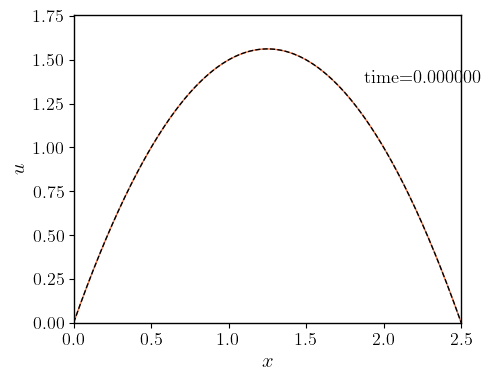

In [6]:
address = 'Data/'+nameZip+'.npz'
figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.13))
dvideo = mod.Visualization(address, figData)

n0 = 0
dataname = '.data'
nameV = 'video_quadratic'
xmin, xmax, ls, lw, color = xi[0], xi[-1], '-', 1, '#f0784d'
struc = [xmin, xmax, ls, lw, color]

Sol_exact = lambda x, t: x*(xmax-x)*(1 + 0.5*t)
dvideo.video(n0, dataname, struc, nameV, solEx=Sol_exact, show=False)

### Simulación de ondas en una cuerda

Consideremos el caso de ondas unidimensionales en una cuerda, por ejemplo, en una guitarra. Supongamos que la cuerda en estado deformado coincide con el intervalo $[0, L]$ a lo largo del eje $x$, y $u(x, t)$ representa el desplazamiento en el tiempo $t$ en la dirección $x$ con una velocidad $c$ desde un punto inicialmente $x_0$. La función de desplazamiento $u$ está determinada por el modelo matemático (ecuación de onda uni-dimensional)
$$
\frac{\partial^2 u}{\partial t^2}=c^2\frac{\partial^2 u}{\partial x^2}, \qquad x\in(0, L), t\in(0, T]
$$

Como la ecuación diferencial es de segundo orden, tanto en el tiempo, como en el espacio necesitamos dos condiciones iniciales las cuales especifícan la forma de la cuerda y la velocidad inicial de la misma:
$$
u(x, 0)=I(x), \quad \frac{\partial}{\partial t}u(x, 0)=0, \qquad x\in[0, L],
$$
y dos condiciones de fronteras las cuales definiremos acorde a una cuerda con los extremos fijos (el desplazamiento de $u$ es cero):
$$
u(0, t)=0, \quad u(L, t)=0, \qquad t\in(0, T].
$$


In [11]:
# Ejemplo 2
def guitar(xlim, utilez, mu, sig, m=0, C=1, ZipName='SimulacionData'):
    """Gauss wave (pulled guitar string)."""

    x0, xmax = xlim
    Nx, a0, wavelength, freq, num_periods = utilez
    
    c = freq*wavelength
    omega = 2*np.pi*freq
    tmax = 2*np.pi/omega*num_periods
    dt = C*(xmax/Nx)/c

    # fuente
    f = lambda x, t: 0

    def gaussian(x, mu, sig, a0):
        return a0/(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

    def I(x):
        Ixi = gaussian(x, mu, sig, a0)
        return Ixi

    u, xi, ti, cpu_time = mod.solver(I, xmax, tmax, dt, C, m=m, x0=x0, c=c, f=f, ZipName=ZipName)   
    return u, xi, ti, cpu_time

In [25]:
a0, mu, sig = 0.01, 0, 0.5
x0, xmax = -15, 15
num_periods = 2
freq = 440
m = 0
wavelength = 2*xmax
c = 1.5;  Nx = 800
xlim = [x0, xmax]
utilez = [Nx, a0, wavelength, freq, num_periods]
nameZip = 'SimulacionData2'

u, xi, ti, cpu_time = guitar(xlim, utilez, mu, sig, m=m, C=1, ZipName=nameZip)

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_99914/61304223.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,


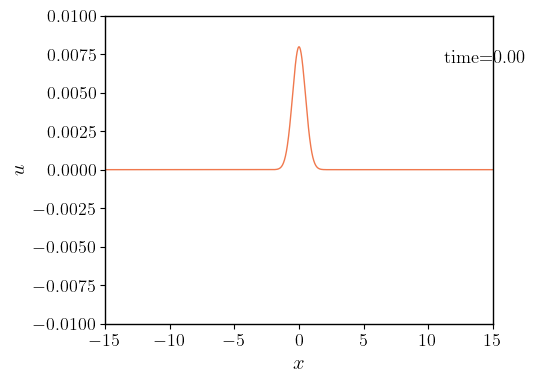

In [26]:
address = 'Data/SimulacionData2.npz'
figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.13))
dvideo = mod.Visualization(address, figData)

n0 = 0
dataname = '.data'
nameV = 'video_guitar2'
xmin, xmax, ls, lw, color = xi[0], xi[-1], '-', 1, '#f0784d'
struc = [xmin, xmax, ls, lw, color]

dvideo.video(n0, dataname, struc, nameV, show=True, ylim=[-.01, .01])

In [27]:
# Ejemplo 2
def soliton(xlim, utilez, mu, sig, m=0, C=1, ZipName='SimulacionData'):
    """Gauss wave (pulled guitar string)."""

    x0, xmax = xlim
    Nx, a0, tmax = utilez
    
    c = 1
    dt = C*(xmax/Nx)/c

    # fuente
    f = lambda x, t: 0

    def gaussian(x, mu, sig, a0):
        return a0/(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

    def I(x):
        Ixi = gaussian(x, mu, sig, a0)
        return Ixi

    u, xi, ti, cpu_time = mod.solver(I, xmax, tmax, dt, C, m=m, x0=x0, c=c, f=f, ZipName=ZipName)   
    return u, xi, ti, cpu_time

In [29]:
a0, mu, sig = 0.01, 0, 0.5
x0, xmax = -15, 15
tmax = 20
m = 1
Nx = 800
xlim = [x0, xmax]
utilez = [Nx, a0, tmax]
nameZip = 'SimulacionData3'

u, xi, ti, cpu_time = soliton(xlim, utilez, mu, sig, m=m, C=1, ZipName=nameZip)

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_99914/3331535696.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,


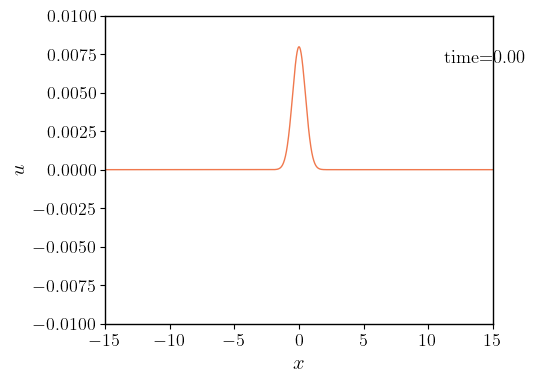

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_99914/3331535696.py", line 12, in <module>
    dvideo.video(n0, dataname, struc, nameV, show=True, ylim=[-.01, .01])
  File "/Users/armandoroqueestrada/Library/Mobile Documents/com~apple~CloudDocs/GitHub/GR_NS_BS/Solitons/Notebook/Module.py", line 385, in video
    anim.save(nameV+'.mp4', bitrate=bitrate, fps=fps, extra_args=extra_args)  # direc+nameV+
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py", line 1105, in save
    anim._draw_next_frame(d, blit=False)
  File "/opt/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py", line 1141, in _draw_next_frame
    self._post_draw(framedata, blit)
  File "/opt/anaco

In [31]:
address = 'Data/SimulacionData3.npz'
figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.13))
dvideo = mod.Visualization(address, figData)

n0 = 0
dataname = '.data'
nameV = 'video_guitar3'
xmin, xmax, ls, lw, color = xi[0], xi[-1], '-', 1, '#f0784d'
struc = [xmin, xmax, ls, lw, color]

dvideo.video(n0, dataname, struc, nameV, show=True, ylim=[-.01, .01])

In [ ]:
def guitar():
    """Triangular wave (pulled guitar string)."""
    xmax = 0.75
    x0 = 0.8*xmax
    a = 0.005
    freq = 440
    wavelength = 2*xmax
    c = freq*wavelength
    C = 1
    omega = 2*np.pi*freq
    num_periods = 2
    tmax = 2*np.pi/omega*num_periods
    # Choose dt the same as the stability limit for Nx=50
    Nx = 80 
    dt = xmax/Nx/c

    def I(x):
        Ixi = a*x/x0
        ind = x > x0
        Ixi[ind] = a/(xmax-x0)*(xmax-x[ind])
        return Ixi

    u, xi, ti, cpu_time = mod.solver(I, xmax, tmax, dt, C, c=c, ZipName='SimulacionData2')   
    return u, xi, ti, cpu_time

In [ ]:
u, xi, ti, cpu_time = guitar()

In [ ]:
address = 'Data/SimulacionData2.npz'
figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.13))
dvideo = mod.Visualization(address, figData)

n0 = 0
dataname = '.data'
nameV = 'video_guitar'
xmin, xmax, ls, lw, color = xi[0], xi[-1], '-', 1, '#f0784d'
struc = [xmin, xmax, ls, lw, color]

dvideo.video(n0, dataname, struc, nameV, show=True, ylim=[-.01, .01])

In [42]:
# Ejemplo 3

def soliton2(xlim, tlim, utilez, NoHomog=[0, 0], ZipName='SimulacionData', info=False,
           user_action=None):
    """Gauss wave (pulled guitar string)."""

    xmin, xmax = xlim
    tmin, tmax = tlim
    Nx, v, v0, lam, m , C = utilez
    
    dt = C*(xmax/Nx)
    dx = dt/float(C)

    def kinProf(x, lam, v, v0, m):
        return lam*v*np.tanh(m*x/(np.sqrt(2*(1-v0**2))))
    
    def dkinProf(x, lam, v, v0, m):
        return (-lam*m*v*v0/np.sqrt(2*(1-v0**2)))/np.cosh(m*x/(np.sqrt(2*(1-v0**2))))**2

    def u0x(x):
        uxi0 = kinProf(x, lam, v, v0, m)
        return uxi0
    
    def ut(x):
        duxi0 = dkinProf(x, lam, v, v0, m)
        return duxi0
        
    dVx = lambda u: lam*(u**2-v**2)*u
    
    u, xi, ti, cpu_time = mod.solver(dt=dt, dx=dx, xmin=xmin, xmax=xmax, tmin=tmin, tmax=tmax,
                                     ux=u0x, dux=ut, dVx=dVx, NoHomog=NoHomog, ZipName=ZipName,
                                     info=info, user_action=user_action)
    
    return u, xi, ti, cpu_time

In [46]:
x0, xmax = -10, 10
xlim = [x0, xmax]

tmin, tmax = 0, 10
tlim = [tmin, tmax]

v = 1
m = 1
lam = 1
v0 = 0.5
Nx = 500
C = 1

utilez = [Nx, v, v0, lam, m, C]
nameZip = 'SimulacionData3'
NoHomog = [-v, v]

u, xi, ti, cpu_time = soliton2(xlim, tlim, utilez, NoHomog=NoHomog, ZipName=nameZip, info=False,
           user_action=None)

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_43629/3236642675.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,


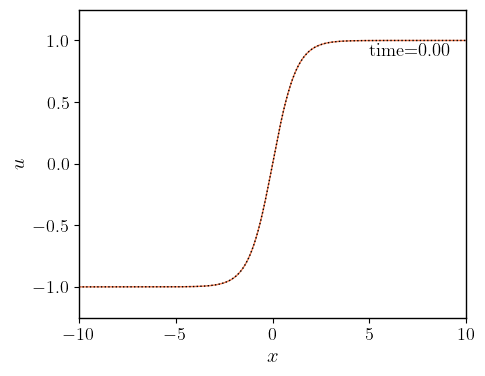

In [45]:
address = 'Data/SimulacionData3.npz'
figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.13))
fu = lambda t, x: lam*v*np.tanh(m*(x-v0*t)/np.sqrt(1-v0**2)/np.sqrt(2))
dvideo = mod.Visualization(address, figData, solAnalit=fu)

n0 = 0
dataname = '.data'
nameV = 'soliton3'
xmin, xmax, ls, lw, color = xi[0], xi[-1], '-', 1, '#f0784d'
struc = [xmin, xmax, ls, lw, color]

dvideo.video(n0, dataname, struc, nameV, show=True, ylim=[-1.25, 1.25])